In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv("energygen.csv")

In [4]:
df.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 4945 non-null   int64  
 1   Date                                  4945 non-null   object 
 2   Region                                4945 non-null   object 
 3   Thermal Generation Actual (in MU)     4945 non-null   object 
 4   Thermal Generation Estimated (in MU)  4945 non-null   object 
 5   Nuclear Generation Actual (in MU)     2967 non-null   float64
 6   Nuclear Generation Estimated (in MU)  2967 non-null   float64
 7   Hydro Generation Actual (in MU)       4945 non-null   float64
 8   Hydro Generation Estimated (in MU)    4945 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 270.5+ KB


In [6]:
df.describe()

,index,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
count,4945.000000,2967.000000,2967.000000,4945.000000,4945.000000
mean,2181.433771,37.242208,36.987877,73.305921,76.842965
std,1397.754755,15.883968,11.491292,74.482145,82.043952
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,926.000000,26.140000,30.190000,26.910000,23.310000
50%,2162.000000,30.720000,34.840000,52.960000,50.270000
75%,3398.000000,46.830000,43.075000,85.940000,95.800000
max,4634.000000,68.740000,76.640000,348.720000,397.380000


In [7]:
df.isna().sum()

index                                      0
Date                                       0
Region                                     0
Thermal Generation Actual (in MU)          0
Thermal Generation Estimated (in MU)       0
Nuclear Generation Actual (in MU)       1978
Nuclear Generation Estimated (in MU)    1978
Hydro Generation Actual (in MU)            0
Hydro Generation Estimated (in MU)         0
dtype: int64

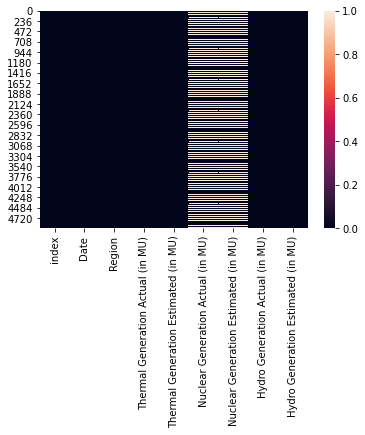

In [13]:
plt.show(sns.heatmap(df.isnull()))

In [14]:
df.Region.unique()

array(['Northern', 'Western', 'Southern', 'Eastern', 'NorthEastern'],
      dtype=object)